
💡 **Question 1**

Given two strings s and t, *determine if they are isomorphic*.

Two strings s and t are isomorphic if the characters in s can be replaced to get t.

All occurrences of a character must be replaced with another character while preserving the order of characters. No two characters may map to the same character, but a character may map to itself.

**Example 1:**

**Input:** s = "egg", t = "add"

**Output:** true



In [ ]:
class Solution:
    def isIsomorphic(self, s: str, t: str) -> bool:
        if len(s) != len(t):
            return False
    
        s_to_t = {}
        t_to_s = {}
    
        for i in range(len(s)):
            if s[i] in s_to_t:
                if s_to_t[s[i]] != t[i]:
                    return False
            else:
                if t[i] in t_to_s:
                    return False
                s_to_t[s[i]] = t[i]
                t_to_s[t[i]] = s[i]
    
        return True
    
# link :https://leetcode.com/problems/isomorphic-strings/description/


💡 **Question 2**

Given a string num which represents an integer, return true *if* num *is a **strobogrammatic number***.

A **strobogrammatic number** is a number that looks the same when rotated 180 degrees (looked at upside down).

**Example 1:**

**Input:** num = "69"

**Output:**

true



In [ ]:
class Solution(object):
    def isStrobogrammatic(self, num):
      
        maps = {("0", "0"), ("1", "1"), ("6", "9"), ("8", "8"), ("9", "6")}
        i,j = 0, len(num) - 1
        while i <= j:
            if (num[i], num[j]) not in maps:
                return False
            i += 1
            j -= 1
        return True
link:https://leetcode.com/problems/strobogrammatic-number/


💡 **Question 3**

Given two non-negative integers, num1 and num2 represented as string, return *the sum of* num1 *and* num2 *as a string*.

You must solve the problem without using any built-in library for handling large integers (such as BigInteger). You must also not convert the inputs to integers directly.

**Example 1:**

**Input:** num1 = "11", num2 = "123"

**Output:**

"134"



In [ ]:
class Solution:
    def addStrings(self, num1: str, num2: str) -> str:
    # Reverse the input strings to start adding from the least significant digits
        num1 = num1[::-1]
        num2 = num2[::-1]
    # Pad the shorter input string with zeros
        if len(num1) < len(num2):
        num1 += '0' * (len(num2) - len(num1))
        else:
        num2 += '0' * (len(num1) - len(num2))
    
    result = ''
    carry = 0
    
    # Loop through both strings, starting from the least significant digits
        for i in range(len(num1)):
        # Convert the current digit in each string to an integer and add them together
            digit_sum = int(num1[i]) + int(num2[i]) + carry
        # Determine the carry for the next iteration, if any
            carry = digit_sum // 10
        # Append the least significant digit of the sum to the result string
            result += str(digit_sum % 10)
    
    # If there is a carry after the last iteration, append it to the result string
        if carry > 0:
        result += str(carry)
    
    # Reverse the result string to obtain the final sum
       return result[::-1]
link:https://leetcode.com/problems/add-strings/description/


💡 **Question 4**

Given a string s, reverse the order of characters in each word within a sentence while still preserving whitespace and initial word order.

**Example 1:**

**Input:** s = "Let's take LeetCode contest"

**Output:** "s'teL ekat edoCteeL tsetnoc"



In [ ]:
def reverseWords_manual(s):  # O(n) both
    res = ''
    l, r = 0, 0
    while r < len(s):
        if s[r] != ' ':
            r += 1
        elif s[r] == ' ':
            res += s[l:r + 1][::-1]
            r += 1
            l = r
    res += ' '
    res += s[l:r + 2][::-1]
    return res[1:]
link:https://leetcode.com/problems/reverse-words-in-a-string-iii/description/


💡 **Question 5**

Given a string s and an integer k, reverse the first k characters for every 2k characters counting from the start of the string.

If there are fewer than k characters left, reverse all of them. If there are less than 2k but greater than or equal to k characters, then reverse the first k characters and leave the other as original.

**Example 1:**

**Input:** s = "abcdefg", k = 2

**Output:**

"bacdfeg"



In [ ]:
class Solution:
    def reverseStr(self, s: str, k: int):

        def reverse_word(x): return x[::-1]

        final_string = ""
        if len(s) <= k:
            final_string = reverse_word(s)
            return final_string

        stack_non_reversed: list = []
        stack_reversed: list = []
        stack_final: list = []

        for i in range(0, len(s), 2*k):
            temp = s[i:i+k]
            stack_non_reversed.append(temp)

        for item in stack_non_reversed:
            stack_reversed.append(reverse_word(item))

        stack_non_reversed.clear()

        for i in range(k, len(s), 2*k):
            temp = s[i:i+k]
            stack_non_reversed.append(temp)

        for i, item in enumerate(stack_reversed):
            stack_final.append(item)
            if i > len(stack_non_reversed)-1:
                continue
            stack_final.append(stack_non_reversed[i])

        for item in stack_final:
            final_string += item

        return final_string
link:https://leetcode.com/problems/reverse-string-ii/description/


💡 **Question 6**

Given two strings s and goal, return true *if and only if* s *can become* goal *after some number of **shifts** on* s.

A **shift** on s consists of moving the leftmost character of s to the rightmost position.

- For example, if s = "abcde", then it will be "bcdea" after one shift.

**Example 1:**

**Input:** s = "abcde", goal = "cdeab"

**Output:**

true



In [ ]:
"""
KMP algorithm
time: O(N)
space: O(N)
"""

class Solution:
    def rotateString(self, A: str, B: str) -> bool:
        if len(A) != len(B): return False
        if len(A) == 0: return True
        
        # capture length of strings
        # then make both strings 1 indexed
        N = len(A)
        A = " " + A + A
        B = " " + B
        
        # calculate pi table, it captures the length of the
		# longest prefix that is also the suffix
        pi = [0] * (N+1)
        left, pi[0] = -1, -1
        for right in range(1, N+1):
            while left >= 0 and B[left + 1] != B[right]:
                left = pi[left]
            left += 1
            pi[right] = left
        
        # do matching
        j = 0
        for i in range(1, (2*N)+1):
            while j >= 0 and B[j+1] != A[i]:
                j = pi[j]
            j += 1
            if j == N: return True
        
        return False
link:https://leetcode.com/problems/rotate-string/description/


💡 **Question 7**

Given two strings s and t, return true *if they are equal when both are typed into empty text editors*. '#' means a backspace character.

Note that after backspacing an empty text, the text will continue empty.

**Example 1:**

**Input:** s = "ab#c", t = "ad#c"

**Output:** true

**Explanation:**

Both s and t become "ac".



In [ ]:
class Solution(object):
    def backspaceCompare(self, S, T):
        def F(S):
            skip = 0
            for x in reversed(S):
                if x == '#':
                    skip += 1
                elif skip:
                    skip -= 1
                else:
                    yield x

        return all(x == y for x, y in itertools.izip_longest(F(S), F(T)))
link:https://leetcode.com/problems/backspace-string-compare/description/

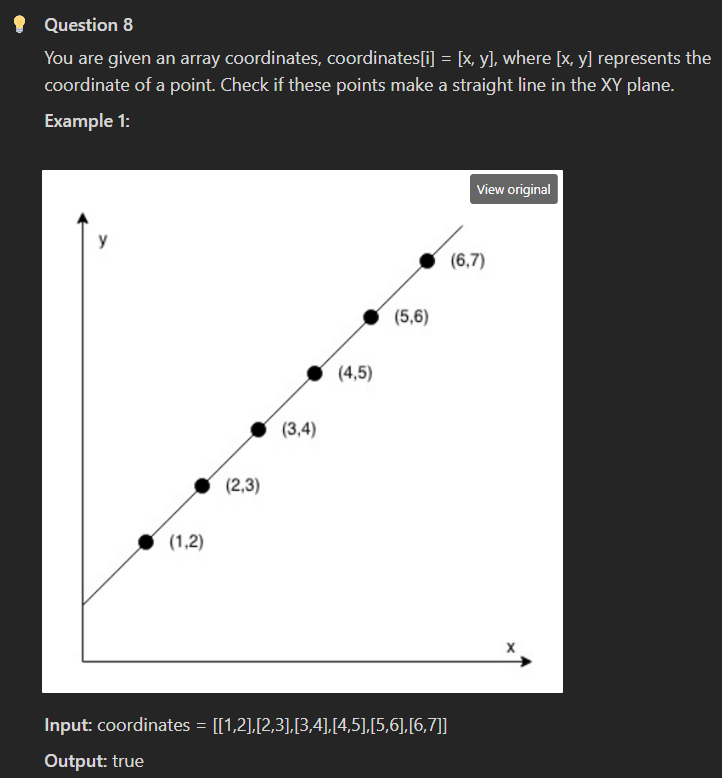

In [ ]:
class Solution:
    def checkStraightLine(self, coordinates):
        x0, y0 = coordinates[0]
        x1, y1 = coordinates[1]

        for i in range(2, len(coordinates)):
            x, y = coordinates[i]
            if (x - x0) * (y1 - y0) != (y - y0) * (x1 - x0):
                return False

        return True
link:https://leetcode.com/problems/check-if-it-is-a-straight-line/description/